# Support Vector Machines

## 1. Social Network Ads 

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

1. Importa las librerías necesarias y carga el dataset.

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc


%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv')
dataset.head()
#https://www.kaggle.com/akashbhiwgade/social-networks-ads-classification-svm
dataset.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(400, 5)

In [34]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


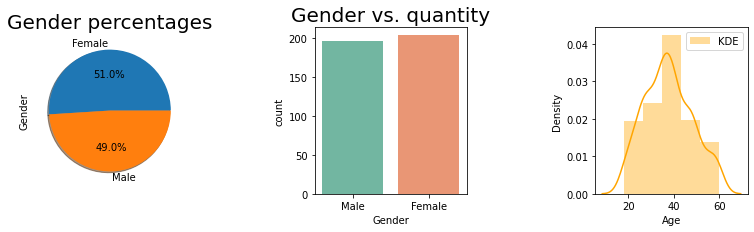

In [35]:
print(pd.isnull(dataset).sum())
plt.subplot(231)
dataset['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Gender percentages', fontsize = 20)
plt.tight_layout()
plt.subplot(232)
sns.countplot(dataset['Gender'], palette = 'Set2')
plt.title ('Gender vs. quantity', fontsize = 20)
plt.subplot(233)
sns.distplot(dataset['Age'], bins = 5, color = 'orange', label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12, 5)

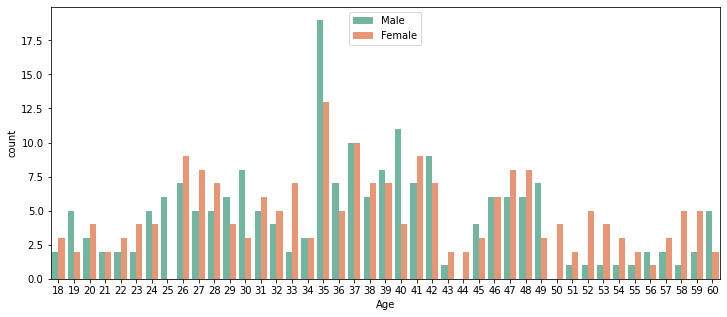

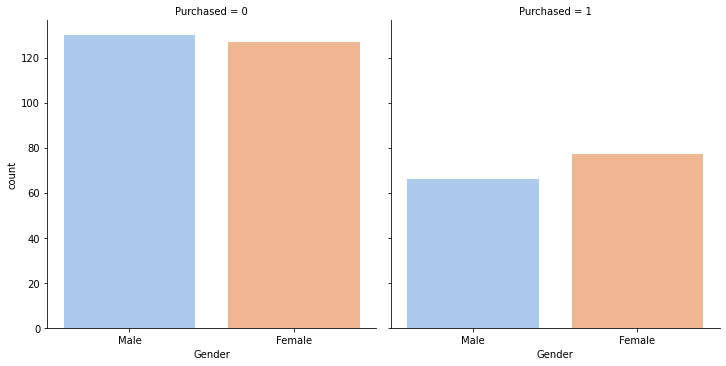

In [36]:

sns.countplot(x = 'Age',data = dataset , hue='Gender', palette = 'Set2')
plt.legend(loc='upper center')
plt.gcf().set_size_inches(12, 5)

sns.catplot(x="Gender", col = 'Purchased', data=dataset, kind = 'count', palette='pastel')
plt.show()

2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [37]:
dataset2 = dataset.copy()
X = dataset2.drop(['User ID','Gender','Purchased'], axis=1)
y = dataset2.Purchased
y.head()
X.head()

#otra forma 
#X = dataset.iloc[:, [2, 3]].values
#Y = dataset.iloc[:, 4].values

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


3. Separa los datos de entrenamiento de los datos de prueba.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42) 

4. Estandariza los datos (`StandardScaler`).

In [39]:
#	Feature	Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train) #1ro hago el train test split, luego aplico la estandarizacion.
#hago el fit en los datos que yo tengo en la realidad los train
#es una forma de hacer primero el fit y luego transformo en la escala.
X_test= sc_X.transform(X_test) #son instancias que supongo que vendran despues y no los escalos.

5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [67]:
#	Fitting	SVM	to	the	Training	Set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state= 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

6. Realiza las predicciones sobre los datos de prueba.

In [41]:
#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)


7. Visualiza los resultados mediante:
 
* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

In [42]:
#	Making	the	Confusion	Matrix 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(confusion_matrix(y_test,y_pred))


[[61  2]
 [12 25]]


In [43]:
# plot_confusion_matrix function

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.96825397 0.03174603]
 [0.32432432 0.67567568]]


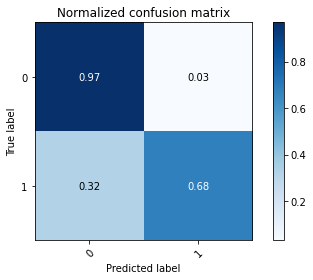

In [44]:
plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True)

In [45]:
from sklearn.metrics import classification_report
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

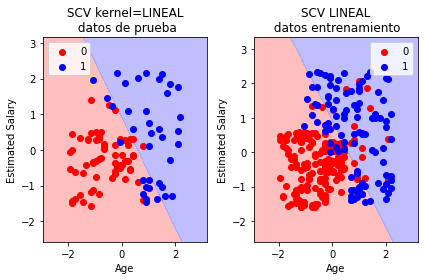

In [68]:
#	Visualisingthe	Training	set	results
plt.subplot(121)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
X_set, y_set= X_test, y_test  #datos de testeo
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV kernel=LINEAL\n datos de prueba') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()


plt.subplot(122)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
X_set, y_set= X_train, y_train  #datos de testeo
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV LINEAL\n datos entrenamiento') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.tight_layout()
plt.show() 

**Para probar:**
1. Modifica el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el mismo y su performance. Por ejemplo, prueba con con los siguientes kernels: `rbf`, `poly` y `sigmoid`.


In [47]:
#kernel rbf

In [72]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma=1, random_state= 42)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100

[[58  5]
 [ 1 36]]
Normalized confusion matrix
[[0.92063492 0.07936508]
 [0.02702703 0.97297297]]


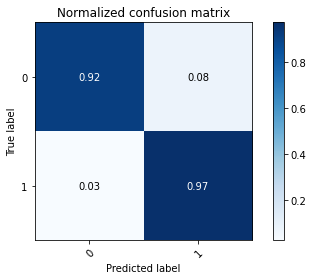

In [76]:
#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred))

#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

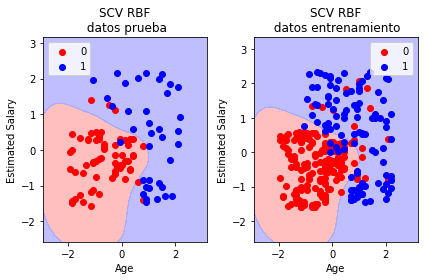

In [74]:

#	Visualisingthe	Training	set	results
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.subplot(121)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV RBF\n datos prueba')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()


plt.subplot(122)
X_set, y_set= X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV RBF\n datos entrenamiento')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.tight_layout()
plt.show() 

In [77]:
#kernel poly 
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree = 3, random_state= 42)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        63
           1       1.00      0.59      0.75        37

    accuracy                           0.85       100
   macro avg       0.90      0.80      0.82       100
weighted avg       0.88      0.85      0.84       100

[[63  0]
 [15 22]]
Normalized confusion matrix
[[1.         0.        ]
 [0.40540541 0.59459459]]


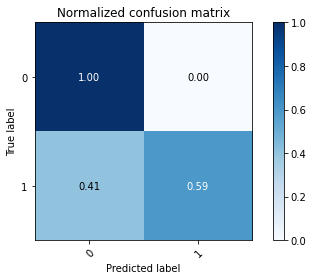

In [78]:
#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred))

#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

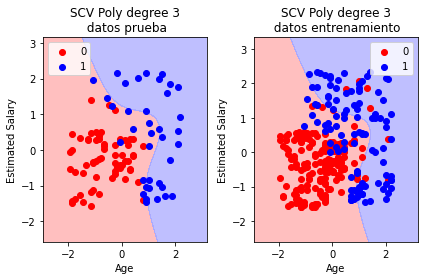

In [79]:

#	Visualisingthe	Training	set	results
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.subplot(121)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV Poly degree 3\n datos prueba')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()


plt.subplot(122)
X_set, y_set= X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV Poly degree 3\n datos entrenamiento')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.tight_layout()
plt.show() 

[[50 13]
 [16 21]]
Normalized confusion matrix
[[0.79365079 0.20634921]
 [0.43243243 0.56756757]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        63
           1       0.62      0.57      0.59        37

    accuracy                           0.71       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.71      0.71      0.71       100



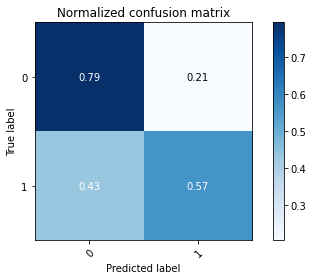

In [81]:
#kernel  sigmoid
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', degree = 3, random_state= 42)
classifier.fit(X_train, y_train)

#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)

#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

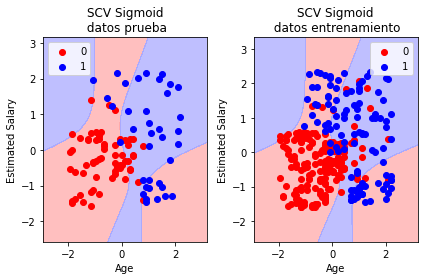

In [82]:

#	Visualisingthe	Training	set	results
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.subplot(121)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV Sigmoid\n datos prueba')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()


plt.subplot(122)
X_set, y_set= X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV Sigmoid\n datos entrenamiento')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.tight_layout()
plt.show() 

2. ¿Cuál es la función del parámetro `Gamma`?

https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

3. Repite el ejercicio 1, modificando los valores de `Gamma`

https://www.researchgate.net/post/Does-anyone-know-what-is-the-Gamma-parameter-about-RBF-kernel-function


https://www.youtube.com/watch?v=m2a2K4lprQw





[[59  4]
 [ 2 35]]
Normalized confusion matrix
[[0.93650794 0.06349206]
 [0.05405405 0.94594595]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.90      0.95      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

[[58  5]
 [ 2 35]]
Normalized confusion matrix
[[0.92063492 0.07936508]
 [0.05405405 0.94594595]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

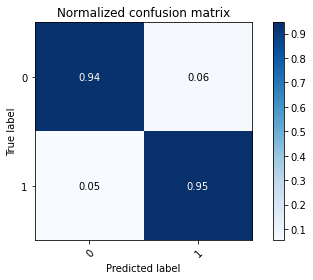

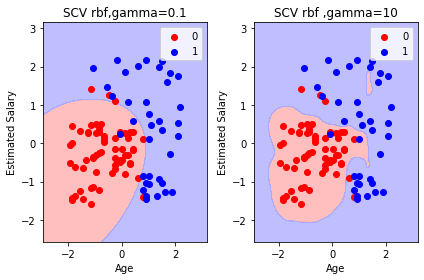

In [56]:
classifier = SVC(kernel = 'rbf', gamma=0.1, random_state= 42)
classifier.fit(X_train, y_train)

classifier2 = SVC(kernel = 'rbf', gamma=10, random_state= 42)
classifier2.fit(X_train, y_train)

#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)
y_pred2= classifier2.predict(X_test)

#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred))


#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred2))

plot_confusion_matrix(y_test, y_pred2, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred2))




#	Visualisingthe	Training	set	results
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.subplot(121)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV rbf,gamma=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(122)

X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV rbf ,gamma=10') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.tight_layout()
plt.show() 



[[63  0]
 [25 12]]
Normalized confusion matrix
[[1.         0.        ]
 [0.67567568 0.32432432]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.83        63
           1       1.00      0.32      0.49        37

    accuracy                           0.75       100
   macro avg       0.86      0.66      0.66       100
weighted avg       0.82      0.75      0.71       100

[[63  0]
 [12 25]]
Normalized confusion matrix
[[1.         0.        ]
 [0.32432432 0.67567568]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        63
           1       1.00      0.68      0.81        37

    accuracy                           0.88       100
   macro avg       0.92      0.84      0.86       100
weighted avg       0.90      0.88      0.87       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

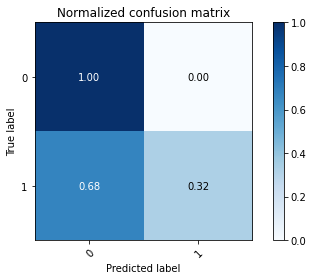

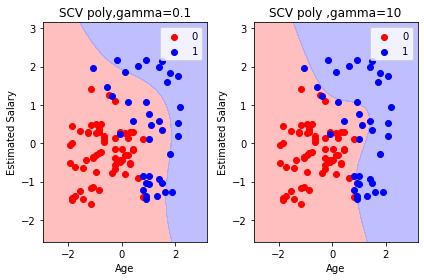

In [83]:
classifier = SVC(kernel = 'poly',degree=3, gamma=0.1, random_state= 42)
classifier.fit(X_train, y_train)

classifier2 = SVC(kernel = 'poly',degree=3, gamma=10, random_state= 42)
classifier2.fit(X_train, y_train)

#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)
y_pred2= classifier2.predict(X_test)

#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred))


#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred2))

plot_confusion_matrix(y_test, y_pred2, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred2))




#	Visualisingthe	Training	set	results
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.subplot(121)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV poly,gamma=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(122)

X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV poly ,gamma=10') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.tight_layout()
plt.show() 

[[61  2]
 [12 25]]
Normalized confusion matrix
[[0.96825397 0.03174603]
 [0.32432432 0.67567568]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100

[[51 12]
 [21 16]]
Normalized confusion matrix
[[0.80952381 0.19047619]
 [0.56756757 0.43243243]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        63
           1       0.57      0.43      0.49        37

    accuracy                           0.67       100
   macro avg       0.64      0.62      0.62       100
weighted avg       0.66      0.67      0.66       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

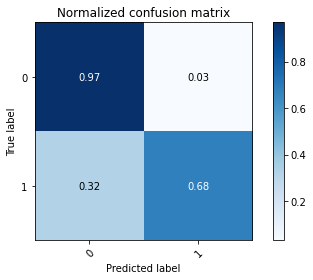

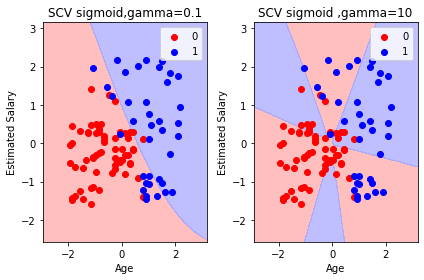

In [84]:
classifier = SVC(kernel = 'sigmoid',degree=3, gamma=0.1, random_state= 42)
classifier.fit(X_train, y_train)

classifier2 = SVC(kernel = 'sigmoid',degree=3, gamma=10, random_state= 42)
classifier2.fit(X_train, y_train)

#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)
y_pred2= classifier2.predict(X_test)

#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred))


#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred2))

plot_confusion_matrix(y_test, y_pred2, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred2))




#	Visualisingthe	Training	set	results
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.subplot(121)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV sigmoid,gamma=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(122)

X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV sigmoid ,gamma=10') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.tight_layout()
plt.show() 

4. Modifica el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 


https://www.youtube.com/watch?v=joTa_FeMZ2s

https://www.youtube.com/watch?v=5oVQBF_p6kY

[[62  1]
 [12 25]]
Normalized confusion matrix
[[0.98412698 0.01587302]
 [0.32432432 0.67567568]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        63
           1       0.96      0.68      0.79        37

    accuracy                           0.87       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.88      0.87      0.86       100

[[58  5]
 [ 2 35]]
Normalized confusion matrix
[[0.92063492 0.07936508]
 [0.05405405 0.94594595]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

[[63  0]
 [15 22]]
Normalized confusion matrix
[[1.         0.        ]
 [0.40540541 0.59459459]]
              precision    recall  f1-score   suppor

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

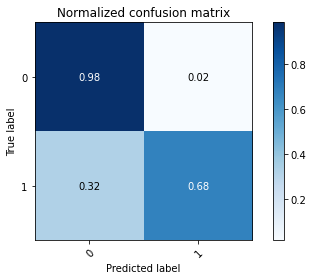

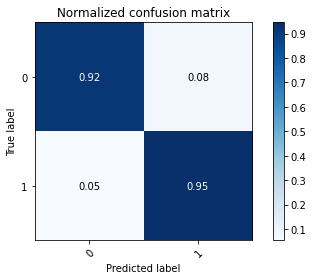

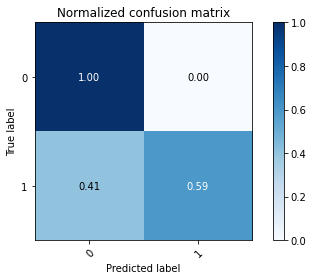

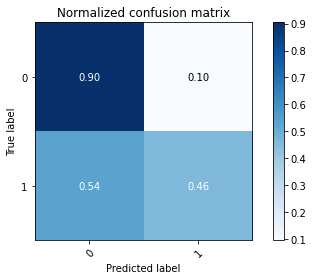

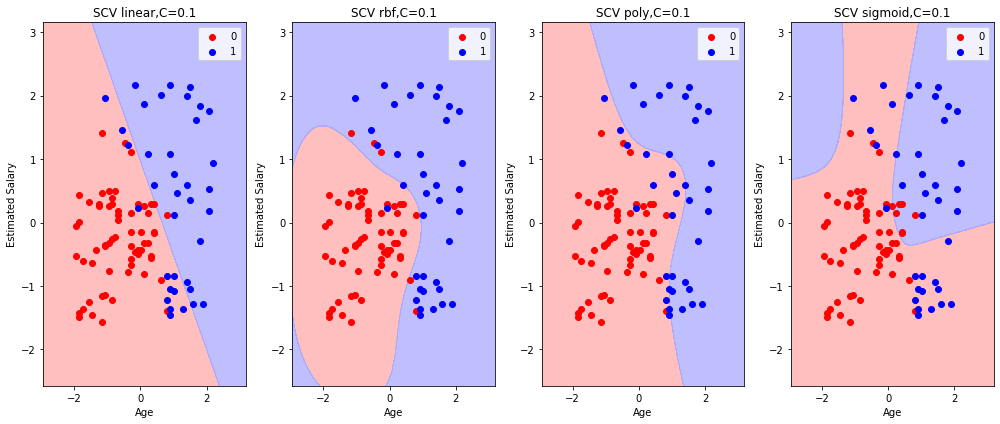

In [88]:
classifier = SVC(kernel = 'linear',C=0.1,degree=3, gamma=1, random_state= 42)
classifier.fit(X_train, y_train)

classifier2 = SVC(kernel = 'rbf',C=0.1,degree=3, gamma=1, random_state= 42)
classifier2.fit(X_train, y_train)

classifier3 = SVC(kernel = 'poly',C=0.1,degree=3, gamma=1, random_state= 42)
classifier3.fit(X_train, y_train)

classifier4 = SVC(kernel = 'sigmoid',C=0.1,degree=3, gamma=1, random_state= 42)
classifier4.fit(X_train, y_train)

#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)
y_pred2= classifier2.predict(X_test)
y_pred3= classifier3.predict(X_test)
y_pred4= classifier4.predict(X_test)


#la matriz de confucion y el reporte lo hace comparando lo predicho con los train y los datos testet
#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred))


#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred2))

plot_confusion_matrix(y_test, y_pred2, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred2))



#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred3))

plot_confusion_matrix(y_test, y_pred3, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred3))


#	Making	the	Confusion	Matrix 
print(confusion_matrix(y_test,y_pred4))

plot_confusion_matrix(y_test, y_pred4, classes=['0','1'], normalize=True)
# Comaparamos con las etiquetas reales
print(classification_report(y_test, y_pred4))


#	Visualisingthe	Training	set	results (esto es datos test)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.figure(figsize=(14,6))
plt.subplot(141)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV linear,C=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(142)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV rbf,C=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(143)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV poly,C=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(144)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV sigmoid,C=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.tight_layout()
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

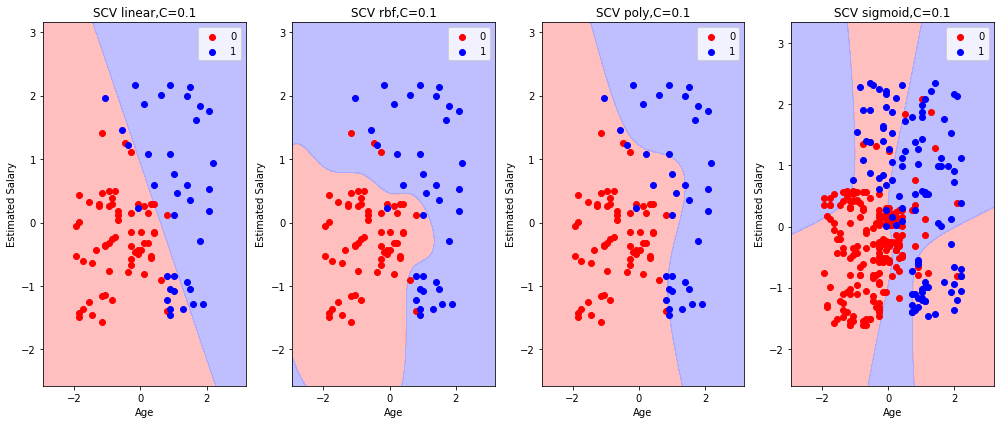

In [89]:
classifier = SVC(kernel = 'linear',C=10,degree=3, gamma=1, random_state= 42)
classifier.fit(X_train, y_train)

classifier2 = SVC(kernel = 'rbf',C=10,degree=3, gamma=1, random_state= 42)
classifier2.fit(X_train, y_train)

classifier3 = SVC(kernel = 'poly',C=10,degree=3, gamma=1, random_state= 42)
classifier3.fit(X_train, y_train)

classifier4 = SVC(kernel = 'sigmoid',C=10,degree=3, gamma=1, random_state= 42)
classifier4.fit(X_train, y_train)

#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)
y_pred2= classifier2.predict(X_test)
y_pred3= classifier3.predict(X_test)
y_pred4= classifier4.predict(X_test)


#	Visualisingthe	Training	set	results (esto es datos test)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.figure(figsize=(14,6))
plt.subplot(141)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV linear,C=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(142)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV rbf,C=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(143)
X_set, y_set= X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV poly,C=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.subplot(144)
X_set, y_set= X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap=cmap_light) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set== j, 0], X_set[y_set== j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SCV sigmoid,C=0.1') 
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.tight_layout()
plt.show() 




## 2. Manos a la obra: Kernel + SVM

En base a todo lo visto en anteriormente, vamos a aplicar SVM al dataset `DS_Clase_04_iris.csv` ¿Cuantas clases tiene este dataset? ¿Es un problema multiclase? 

**Para investigar:** ¿Qué función cumple el parámetro `decision_function_shape` de la función SVC de scikit-learn?

**Ejercicios:**

1. Implementa 3 clasificadores SVM con Kernels: `Polinómico`, `Gaussiano` (rbf) y `Sigmoide`
2. Realiza la matriz de confusión y el reporte de clasificación para cada kernel.
3. ¿Qué Kernel produce los mejores resultados?


`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.

In [115]:
#ver el de estefi que hizo con todos los atributos

from sklearn import datasets 

from sklearn.datasets import load_iris
iris = datasets.load_iris() #es un diccionario y veo los datos y las llaves (veo los distintos arrays del diccionario)

X = iris.data[:, :2]
y = iris.target



https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Aca esta todo el codigo
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [116]:
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


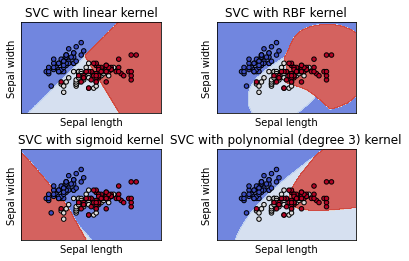

In [118]:
C = 100 # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),  #kernel gaussiano
          svm.SVC(kernel='sigmoid', C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)


# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with sigmoid kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()



SVM linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.64      0.74        11
           2       0.73      0.92      0.81        12

    accuracy                           0.87        38
   macro avg       0.87      0.85      0.85        38
weighted avg       0.88      0.87      0.87        38

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.63636364 0.36363636]
 [0.         0.08333333 0.91666667]]

SVM rbf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.54      0.64      0.58        11
           2       0.60      0.50      0.55        12

    accuracy                           0.74        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.74      0.74      0.74        38

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.6

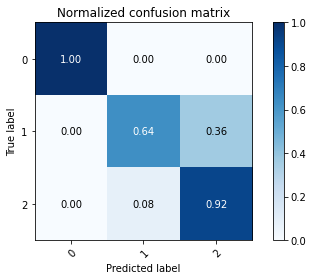

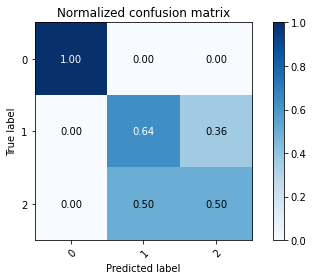

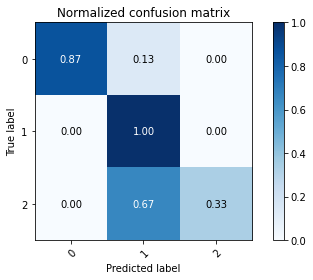

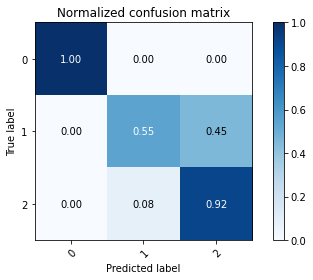

In [108]:
from sklearn import datasets 

from sklearn.datasets import load_iris
iris = datasets.load_iris() #es un diccionario y veo los datos y las llaves (veo los distintos arrays del diccionario)

X = iris.data[:, :2]
y = iris.target


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42) 

from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train) #1ro hago el train test split, luego aplico la estandarizacion.
#hago el fit en los datos que yo tengo en la realidad los train
#es una forma de hacer primero el fit y luego transformo en la escala.
X_test= sc_X.transform(X_test)

#falta las metricas

classifier = SVC(kernel = 'linear',C=0.1,degree=3, gamma=1, random_state= 42)
classifier.fit(X_train, y_train)

classifier2 = SVC(kernel = 'rbf',C=0.1,degree=3, gamma=1, random_state= 42)
classifier2.fit(X_train, y_train)

classifier3 = SVC(kernel = 'poly',C=0.1,degree=3, gamma=1, random_state= 42)
classifier3.fit(X_train, y_train)

classifier4 = SVC(kernel = 'sigmoid',C=0.1,degree=3, gamma=1, random_state= 42)
classifier4.fit(X_train, y_train)

#	Predicting	the	Test	Set	results
y_pred= classifier.predict(X_test)
y_pred2= classifier2.predict(X_test)
y_pred3= classifier3.predict(X_test)
y_pred4= classifier4.predict(X_test)


#la matriz de confucion y el reporte lo hace comparando lo predicho con los train y los datos testet
print('\nSVM linear')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=['0','1','2'], normalize=True)
print('\nSVM rbf')
print(classification_report(y_test, y_pred2))
plot_confusion_matrix(y_test, y_pred2, classes=['0','1','2'], normalize=True)

print('\nSVM poly')
print(classification_report(y_test, y_pred3))
plot_confusion_matrix(y_test, y_pred3, classes=['0','1','2'], normalize=True)

print('\nSVM sigmoid')
print(classification_report(y_test, y_pred4))
plot_confusion_matrix(y_test, y_pred4, classes=['0','1','2'], normalize=True)





**conclusion**

If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.

Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.